<a href="https://colab.research.google.com/github/WesleySouza13/AutoEncoder-torch/blob/main/projeto_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [463]:
#importação
import torchvision
from torchvision import datasets, transforms
import torch
from torch import nn, optim
import matplotlib.pyplot as plt


In [464]:
#base dados

data_train = datasets.MNIST('MNIST - data', train = True, download=True,
                            transform=transforms.ToTensor())
loader_train = torch.utils.data.DataLoader(data_train, batch_size=256, shuffle=True)

data_val = datasets.MNIST('MNIST - data', train=False, download=True,
                          transform=transforms.ToTensor())

loader_val = torch.utils.data.DataLoader(data_val, batch_size=256, shuffle=True)

In [465]:
28*28

784

In [466]:
#construção do autoencoder
class autoencoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(in_features=784, out_features=32)
    self.activation0 = nn.ReLU()
    self.dense1 = nn.Linear(32,784)
    self.activation1 = nn.Sigmoid()

  def forward(self, x):
      x = x.view(-1,28*28)
      x = self.dense0(x)
      x = self.activation0(x)
      x = self.dense1(x)
      x = self.activation1(x)

      return x


In [467]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [468]:
modelo = autoencoder()
modelo.to(device)

autoencoder(
  (dense0): Linear(in_features=784, out_features=32, bias=True)
  (activation0): ReLU()
  (dense1): Linear(in_features=32, out_features=784, bias=True)
  (activation1): Sigmoid()
)

In [469]:
criterion = nn.BCELoss()
optimizer = optim.SGD(modelo.parameters())

In [470]:
#treinamento
for epoch in range(20):
  running_loss_train = 0
  for data in loader_train:
    modelo.train()
    inputs, _ = data
    inputs = inputs.to(device)
    optimizer.zero_grad

    outputs = modelo.forward(inputs)
    loss = criterion(outputs, inputs.view(*outputs.shape))
    loss.backward()
    optimizer.step()
    running_loss_train +=loss.item()


    #validação
  running_loss_val = 0
  for data in loader_val:
    modelo.eval()
    inputs, _ = data
    inputs = inputs.to(device)


    outputs = modelo.forward(inputs)
    loss = criterion(outputs, inputs.view(*outputs.shape))

    running_loss_val +=loss.item()



    print('ÉPOCA {:3d}: perda_train {:.5f} perda_val {:.5f}'.format(epoch + 1, running_loss_train/len(loader_train), running_loss_val/len(loader_val)))





ÉPOCA   1: perda_train 0.69011 perda_val 0.01702
ÉPOCA   1: perda_train 0.69011 perda_val 0.03404
ÉPOCA   1: perda_train 0.69011 perda_val 0.05105
ÉPOCA   1: perda_train 0.69011 perda_val 0.06806
ÉPOCA   1: perda_train 0.69011 perda_val 0.08508
ÉPOCA   1: perda_train 0.69011 perda_val 0.10208
ÉPOCA   1: perda_train 0.69011 perda_val 0.11909
ÉPOCA   1: perda_train 0.69011 perda_val 0.13611
ÉPOCA   1: perda_train 0.69011 perda_val 0.15312
ÉPOCA   1: perda_train 0.69011 perda_val 0.17014
ÉPOCA   1: perda_train 0.69011 perda_val 0.18715
ÉPOCA   1: perda_train 0.69011 perda_val 0.20416
ÉPOCA   1: perda_train 0.69011 perda_val 0.22117
ÉPOCA   1: perda_train 0.69011 perda_val 0.23819
ÉPOCA   1: perda_train 0.69011 perda_val 0.25520
ÉPOCA   1: perda_train 0.69011 perda_val 0.27221
ÉPOCA   1: perda_train 0.69011 perda_val 0.28923
ÉPOCA   1: perda_train 0.69011 perda_val 0.30624
ÉPOCA   1: perda_train 0.69011 perda_val 0.32325
ÉPOCA   1: perda_train 0.69011 perda_val 0.34027
ÉPOCA   1: perda_tra

In [471]:
#geração do encoder
#codificador e decodificador

list(modelo.children())

[Linear(in_features=784, out_features=32, bias=True),
 ReLU(),
 Linear(in_features=32, out_features=784, bias=True),
 Sigmoid()]

In [472]:
list(modelo.children())[1]

ReLU()

temos em maos uma imagem de 784 pixels. com isso, o decodificador tera que fazer a transformação para 32 pixes. Na etapa contraria, ele tera que fazer a codificação de 32 para 784.


In [473]:
class encoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.dense0 = list(modelo.children())[0]
    self.activation0 = list(modelo.children())[1]

  def forward(self, x):
      x = x.view(-1,28*28)
      x = self.dense0(x)
      x = self.activation0(x)

      return x

In [474]:
modelo1 = encoder()
modelo1.to(device)

encoder(
  (dense0): Linear(in_features=784, out_features=32, bias=True)
  (activation0): ReLU()
)

In [475]:
#decodificador
list(modelo.children())[3]

Sigmoid()

In [476]:
class decoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.dense0 = list(modelo.children())[2]
    self.activation = list(modelo.children())[3]


  def forward(self, x):

      x = self.dense0(x)
      x = self.activation(x)

      return x



In [477]:
modelo2 = decoder()
modelo2.to(device)

decoder(
  (dense0): Linear(in_features=32, out_features=784, bias=True)
  (activation): Sigmoid()
)

In [478]:
#vizualização dos resultados
num_imagens = 10
imagens_teste = next(iter(loader_val))[0][:num_imagens]
imagens_teste = imagens_teste.to(device)

In [479]:
#imagens codificada
modelo1.eval()
imagens_codificadas = modelo1(imagens_teste)

In [480]:
imagens_codificadas.shape

torch.Size([10, 32])

In [481]:
#imagens decodificas
modelo2.eval()
imagens_decodificadas = modelo2(imagens_codificadas)

In [482]:
imagens_decodificadas.shape

torch.Size([10, 784])

In [483]:
imagens_teste = imagens_teste.detach().cpu().numpy().reshape(-1, 28, 28)
imagens_codificadas = imagens_codificadas.detach().cpu().numpy().reshape(-1, 8, 4)
imagens_decodificadas = imagens_decodificadas.detach().cpu().numpy().reshape(-1, 28, 28)


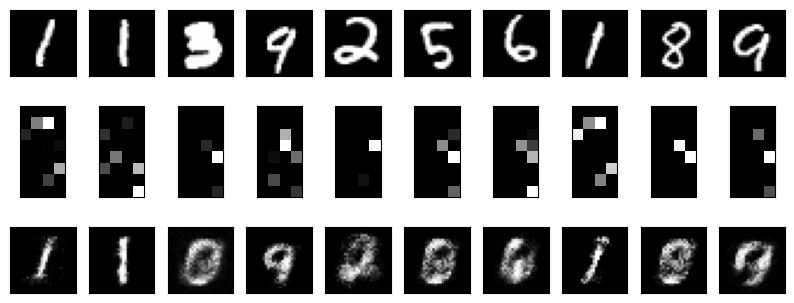

In [484]:
fig, axes = plt.subplots(nrows=3, ncols=num_imagens, figsize=(10,4))
for imagens, ax_row in zip([imagens_teste , imagens_codificadas, imagens_decodificadas],axes):
  for img, ax in zip(imagens, ax_row):
    ax.imshow(img, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
